In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn import preprocessing as preproc # load preprocessing function
import warnings
warnings.filterwarnings("ignore")
sns.set()
from sklearn import linear_model

## Adding variables

In [221]:
# read data
df = pd.read_excel("data/realised_schedule.xlsx")


In [219]:
df

,ScheduleTime,Airline,FlightNumber,Destination,AircraftType,FlightType,Sector,SeatCapacity,LoadFactor
0,2021-01-01 06:35:00,IA,874,DEN,73W,J,US,142,0.408451
1,2021-01-01 10:35:00,JZ,818,YHM,AT7,J,CA,74,0.189189
2,2021-01-01 12:05:00,IA,876,DEN,73W,J,US,142,0.570423
3,2021-01-01 13:20:00,CN,514,EST,AT7,J,US,72,0.333333
4,2021-01-01 14:20:00,LJ,3140,DEN,32A,J,US,186,0.204301
...,...,...,...,...,...,...,...,...,...
36765,2022-02-08 18:30:00,VW,986,YYZ,320,J,CA,180,0.522222
36766,2022-02-08 19:30:00,LJ,579,YQU,319,J,CA,156,0.532051
36767,2022-02-08 19:40:00,LJ,506,YUL,319,J,CA,156,0.602564
36768,2022-02-08 19:05:00,CL,2708,DAN,73H,J,US,189,0.417989


Added variables: 
- Day og week
- 


Holiday (binary variable)

opmærksom: danmark og kastrup er det samme

In [248]:
hej = pd.get_dummies(data1).drop(['ScheduleTime','LoadFactor' ], axis = 1)
hej

,Destination_AFW,Destination_AHT,Destination_AIV,Destination_AIY,Destination_ALX,Destination_AMN,Destination_AMS,Destination_APH,Destination_ARB,Destination_ASE,...,Destination_YYT,Destination_YYW,Destination_YYZ,Destination_YZF,Destination_YZM,Destination_YZV,Destination_ZBF,Destination_ZNG,Destination_ZSW,Destination_ZTM
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36765,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
36766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36767,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36768,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [241]:
data1 = df[['ScheduleTime','LoadFactor', 'Destination']]
hej = pd.get_dummies(data1).drop(['ScheduleTime','LoadFactor' ], axis = 1)
hej * df['ScheduleTime']

,Destination_AFW,Destination_AHT,Destination_AIV,Destination_AIY,Destination_ALX,Destination_AMN,Destination_AMS,Destination_APH,Destination_ARB,Destination_ASE,...,Destination_YYT,Destination_YYW,Destination_YYZ,Destination_YZF,Destination_YZM,Destination_YZV,Destination_ZBF,Destination_ZNG,Destination_ZSW,Destination_ZTM
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36765,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
36766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36767,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36768,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [259]:


def create_simple_data(df):
    
    
    simple_data = df[['ScheduleTime','LoadFactor', 'Destination', 'FlightType']]
    simple_data['weekday']=df['ScheduleTime'].dt.day_of_week
    
    # create time
    time = (simple_data.ScheduleTime - simple_data.ScheduleTime.iloc[0]) /pd.Timedelta('1 hour')
    min_ = time.min()
    max_ = time.max()
    time =  (time - min_) / (max_ - min_)
    simple_data['time'] = time
    
    #hej = pd.get_dummies(data1).drop(['ScheduleTime','LoadFactor' ], axis = 1)

    
    for i in range(2,8):
        simple_data[f'time_{i}'] = time**i
    
    simple_data['week_day'] = simple_data.weekday.apply(lambda x: str(x))
    
    
    
    return pd.get_dummies(simple_data).drop(['weekday'], axis = 1)
    
#data = create_simple_data(df[df['Destination'] == 'CKE'])
data = create_simple_data(df[df['Sector'] == 'US'])


val_data = data[data['ScheduleTime'] >='2022-02-01']
train_data = data[data['ScheduleTime'] < '2022-02-01']

# Seperate X and y
y_val = val_data.LoadFactor.values
X_val = val_data.drop(["LoadFactor", 'ScheduleTime'], axis = 1).values

y_train = train_data.LoadFactor.values
X_train = train_data.drop(["LoadFactor", 'ScheduleTime'], axis = 1).values

train_data

,ScheduleTime,LoadFactor,time,time_2,time_3,time_4,time_5,time_6,time_7,Destination_AFW,...,FlightType_C,FlightType_G,FlightType_J,week_day_0,week_day_1,week_day_2,week_day_3,week_day_4,week_day_5,week_day_6
0,2021-01-01 06:35:00,0.408451,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,...,0,0,1,0,0,0,0,1,0,0
2,2021-01-01 12:05:00,0.570423,0.000568,3.222367e-07,1.829205e-10,1.038365e-13,5.894369e-17,3.345991e-20,1.899382e-23,0,...,0,0,1,0,0,0,0,1,0,0
3,2021-01-01 13:20:00,0.333333,0.000697,4.853523e-07,3.381315e-10,2.355669e-13,1.641129e-16,1.143329e-19,7.965258e-23,0,...,0,0,1,0,0,0,0,1,0,0
4,2021-01-01 14:20:00,0.204301,0.000800,6.398129e-07,5.117754e-10,4.093605e-13,3.274405e-16,2.619141e-19,2.095006e-22,0,...,0,0,1,0,0,0,0,1,0,0
9,2021-01-01 17:25:00,0.269841,0.001118,1.250184e-06,1.397850e-09,1.562959e-12,1.747569e-15,1.953985e-18,2.184782e-21,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36483,2022-01-31 15:50:00,0.481481,0.979392,9.592092e-01,9.394421e-01,9.200823e-01,9.011215e-01,8.825514e-01,8.643640e-01,0,...,0,0,1,1,0,0,0,0,0,0
36484,2022-01-31 15:50:00,0.486772,0.979392,9.592092e-01,9.394421e-01,9.200823e-01,9.011215e-01,8.825514e-01,8.643640e-01,0,...,0,0,1,1,0,0,0,0,0,0
36486,2022-01-31 17:30:00,0.724490,0.979564,9.595462e-01,9.399372e-01,9.207289e-01,9.019131e-01,8.834819e-01,8.654273e-01,0,...,0,0,1,1,0,0,0,0,0,0
36488,2022-01-31 18:05:00,0.682540,0.979624,9.596641e-01,9.401105e-01,9.209552e-01,9.021903e-01,8.838077e-01,8.657997e-01,0,...,0,0,1,1,0,0,0,0,0,0


4534985949.789618
[ 8.95682649e+00 -1.05263718e+02  5.60448877e+02 -1.51123466e+03
  2.15894489e+03 -1.55867169e+03  4.47211368e+02  1.11359796e+11
  1.11359796e+11  1.11359796e+11  1.11359796e+11  1.11359796e+11
  1.11359796e+11  1.11359796e+11  1.11359796e+11  1.11359796e+11
  1.11359796e+11  1.11359796e+11  1.11359796e+11  1.11359796e+11
  1.11359796e+11  1.11359796e+11  1.11359796e+11  1.11359796e+11
  1.11359796e+11  1.11359796e+11  1.11359796e+11  1.11359796e+11
  1.11359796e+11  1.11359796e+11  1.11359796e+11  1.11359796e+11
  1.11359796e+11  1.11359796e+11  1.11359796e+11  1.11359796e+11
  1.11359796e+11  1.11359796e+11  1.11359796e+11  1.11359796e+11
  1.11359796e+11  1.11359796e+11  1.11359796e+11  1.11359796e+11
  1.11359796e+11  1.11359796e+11  1.11359796e+11  1.11359796e+11
  1.11359796e+11  1.11359796e+11  1.11359796e+11  1.11359796e+11
  1.11359796e+11  1.11359796e+11  1.11359796e+11  1.11359796e+11
  1.11359796e+11  1.11359796e+11  1.11359796e+11  1.11359796e+11
  1.113

,ScheduleTime,LoadFactor,time,time_2,time_3,time_4,time_5,time_6,time_7,Destination_AFW,...,FlightType_C,FlightType_G,FlightType_J,week_day_0,week_day_1,week_day_2,week_day_3,week_day_4,week_day_5,week_day_6
0,2021-01-01 06:35:00,0.408451,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,...,0,0,1,0,0,0,0,1,0,0
2,2021-01-01 12:05:00,0.570423,0.000568,3.222367e-07,1.829205e-10,1.038365e-13,5.894369e-17,3.345991e-20,1.899382e-23,0,...,0,0,1,0,0,0,0,1,0,0
3,2021-01-01 13:20:00,0.333333,0.000697,4.853523e-07,3.381315e-10,2.355669e-13,1.641129e-16,1.143329e-19,7.965258e-23,0,...,0,0,1,0,0,0,0,1,0,0
4,2021-01-01 14:20:00,0.204301,0.000800,6.398129e-07,5.117754e-10,4.093605e-13,3.274405e-16,2.619141e-19,2.095006e-22,0,...,0,0,1,0,0,0,0,1,0,0
9,2021-01-01 17:25:00,0.269841,0.001118,1.250184e-06,1.397850e-09,1.562959e-12,1.747569e-15,1.953985e-18,2.184782e-21,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36483,2022-01-31 15:50:00,0.481481,0.979392,9.592092e-01,9.394421e-01,9.200823e-01,9.011215e-01,8.825514e-01,8.643640e-01,0,...,0,0,1,1,0,0,0,0,0,0
36484,2022-01-31 15:50:00,0.486772,0.979392,9.592092e-01,9.394421e-01,9.200823e-01,9.011215e-01,8.825514e-01,8.643640e-01,0,...,0,0,1,1,0,0,0,0,0,0
36486,2022-01-31 17:30:00,0.724490,0.979564,9.595462e-01,9.399372e-01,9.207289e-01,9.019131e-01,8.834819e-01,8.654273e-01,0,...,0,0,1,1,0,0,0,0,0,0
36488,2022-01-31 18:05:00,0.682540,0.979624,9.596641e-01,9.401105e-01,9.209552e-01,9.021903e-01,8.838077e-01,8.657997e-01,0,...,0,0,1,1,0,0,0,0,0,0


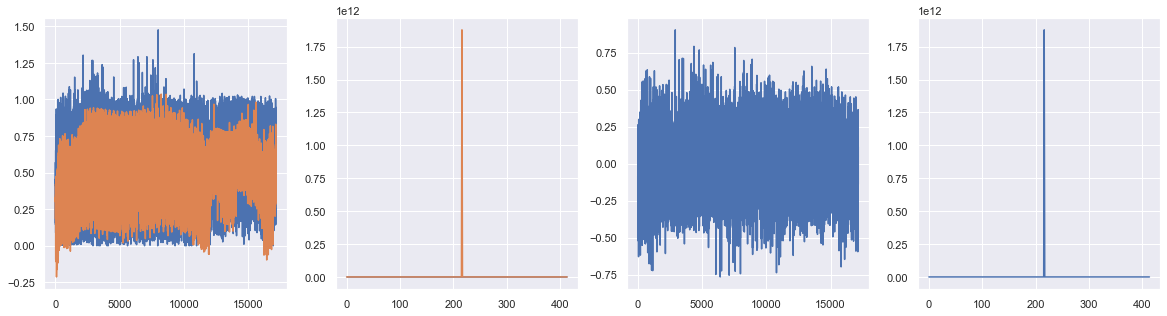

In [260]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

yhat = model.predict(X_val)
yhat_train = model.predict(X_train)
print(np.mean(abs(yhat-y_val)))


fig, ax = plt.subplots(1,4, figsize = (20,5))
ax[0].plot(y_train)
ax[0].plot(yhat_train)
ax[1].plot(y_val)
ax[1].plot(yhat)
ax[2].plot(yhat_train-y_train)
ax[3].plot(yhat-y_val)

print(model.coef_)
train_data



0.19228027216015217
0.3978934308730734
[ 0.44769015 -0.         -0.17641659 -0.10661757 -0.0775648  -0.08720511
 -0.042815    0.         -0.          0.01341817  0.11100721 -0.
  0.02361609  0.          0.          0.14498215  0.09574309  0.17768905
 -0.02075286 -0.24170696 -0.         -0.          0.         -0.
 -0.03867484  0.04542051  0.24850893 -0.1510177  -0.33638161 -0.02033462
  0.          0.00547252  0.00283978  0.09195094  0.16290557 -0.15050667
 -0.         -0.05338997 -0.05013805  0.09494104 -0.07623307 -0.00975052
  0.         -0.29809272 -0.          0.01888339 -0.41785732  0.0554207
  0.09528894  0.16395868 -0.18907866 -0.13437905  0.02247955 -0.17024461
 -0.09591257  0.         -0.33251921 -0.         -0.03863157  0.068892
 -0.29104484  0.01896487  0.06336557 -0.06896901  0.05634458 -0.12352799
 -0.          0.          0.         -0.          0.         -0.10922396
 -0.         -0.18075167 -0.05266926  0.0818322   0.1654433   0.12462131
 -0.13063267 -0.          0.   

,ScheduleTime,LoadFactor,time,time_2,time_3,time_4,time_5,time_6,time_7,Destination_AFW,...,FlightType_C,FlightType_G,FlightType_J,week_day_0,week_day_1,week_day_2,week_day_3,week_day_4,week_day_5,week_day_6
0,2021-01-01 06:35:00,0.408451,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,...,0,0,1,0,0,0,0,1,0,0
2,2021-01-01 12:05:00,0.570423,0.000568,3.222367e-07,1.829205e-10,1.038365e-13,5.894369e-17,3.345991e-20,1.899382e-23,0,...,0,0,1,0,0,0,0,1,0,0
3,2021-01-01 13:20:00,0.333333,0.000697,4.853523e-07,3.381315e-10,2.355669e-13,1.641129e-16,1.143329e-19,7.965258e-23,0,...,0,0,1,0,0,0,0,1,0,0
4,2021-01-01 14:20:00,0.204301,0.000800,6.398129e-07,5.117754e-10,4.093605e-13,3.274405e-16,2.619141e-19,2.095006e-22,0,...,0,0,1,0,0,0,0,1,0,0
9,2021-01-01 17:25:00,0.269841,0.001118,1.250184e-06,1.397850e-09,1.562959e-12,1.747569e-15,1.953985e-18,2.184782e-21,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36483,2022-01-31 15:50:00,0.481481,0.979392,9.592092e-01,9.394421e-01,9.200823e-01,9.011215e-01,8.825514e-01,8.643640e-01,0,...,0,0,1,1,0,0,0,0,0,0
36484,2022-01-31 15:50:00,0.486772,0.979392,9.592092e-01,9.394421e-01,9.200823e-01,9.011215e-01,8.825514e-01,8.643640e-01,0,...,0,0,1,1,0,0,0,0,0,0
36486,2022-01-31 17:30:00,0.724490,0.979564,9.595462e-01,9.399372e-01,9.207289e-01,9.019131e-01,8.834819e-01,8.654273e-01,0,...,0,0,1,1,0,0,0,0,0,0
36488,2022-01-31 18:05:00,0.682540,0.979624,9.596641e-01,9.401105e-01,9.209552e-01,9.021903e-01,8.838077e-01,8.657997e-01,0,...,0,0,1,1,0,0,0,0,0,0


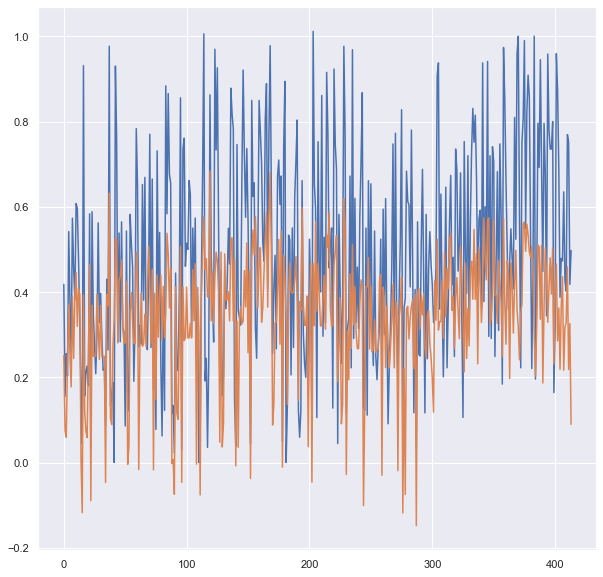

In [261]:
model = linear_model.ElasticNet(alpha = 0.0001, l1_ratio = 0.9)
model.fit(X_train,y_train)

yhat = model.predict(X_val)

print(np.mean(abs(yhat-y_val)))


fig, ax = plt.subplots(1,1, figsize = (10,10))
plt.plot(y_val)
plt.plot(yhat)

print(model.intercept_)
print(model.coef_)
train_data


## Data Analysis

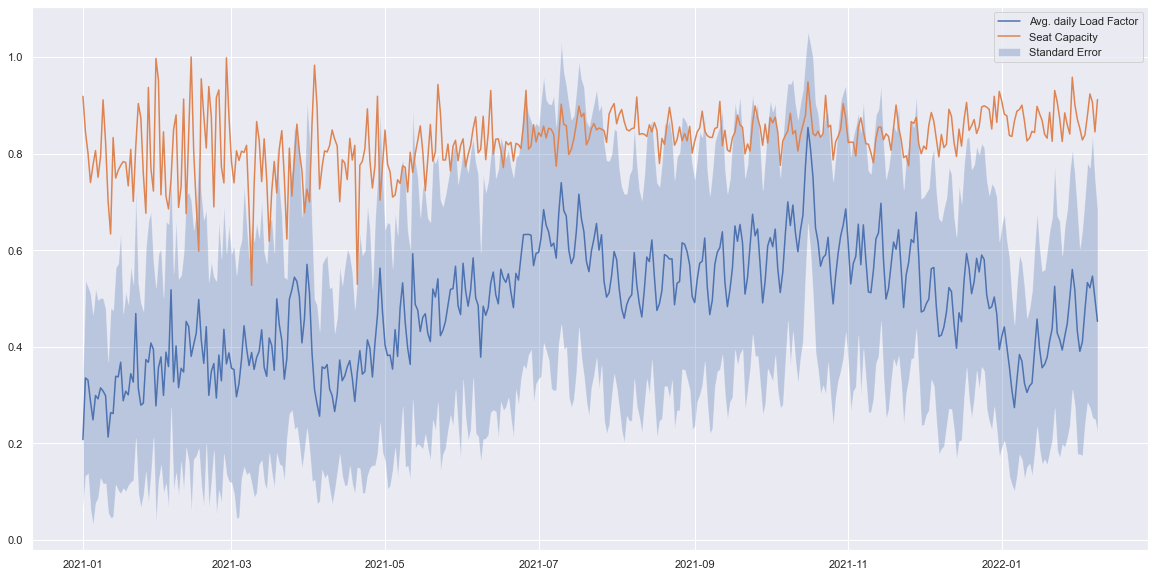

In [5]:
fig,ax = plt.subplots(figsize = (20,10))
df2 = df.set_index("ScheduleTime")
mean = df2.LoadFactor.resample('1d').mean()
mean2 = df2.SeatCapacity.resample('1d').mean() / df2.SeatCapacity.resample('1d').mean().max()
std  = df2.LoadFactor.resample('1d').std(ddof = 1)

ax.plot(mean, label = 'Avg. daily Load Factor')
ax.plot(mean2, label = 'Seat Capacity')
ax.fill_between(std.index, mean - std, mean + std, alpha = 0.3, label = 'Standard Error');
ax.legend()
plt.show()



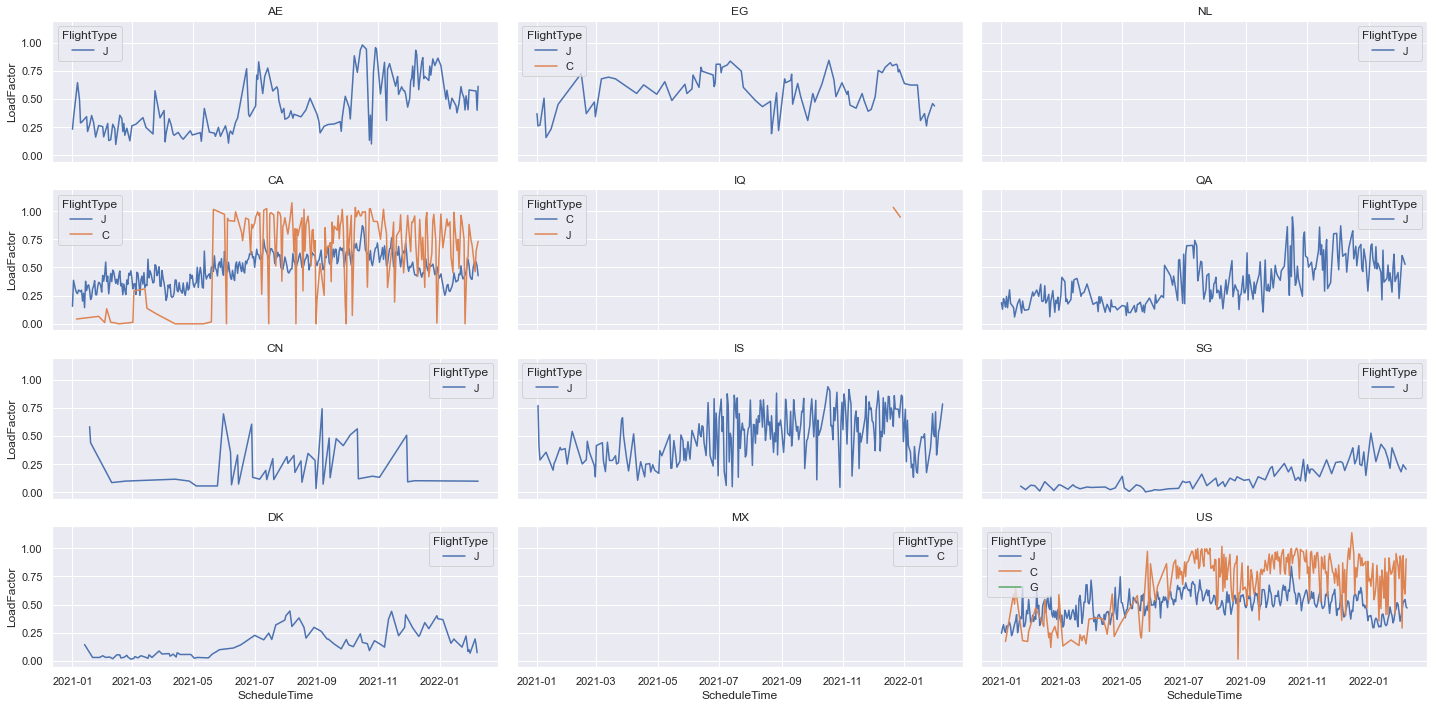

In [6]:
df2 = df.copy()
df2.ScheduleTime = pd.to_datetime(df.ScheduleTime).dt.date
df2
means = df2.groupby(["Sector", "ScheduleTime", 'FlightType']).aggregate({'LoadFactor':'mean'}).reset_index()

dests = means.Sector.unique()

fig, ax = plt.subplots(4,3, figsize = (20,10), sharey = True, sharex=True)

for i in range(len(dests)):
    
    a = ax[i % 4, i // 4]
    sns.lineplot(data = means[means.Sector == dests[i]], x = 'ScheduleTime', y = 'LoadFactor', hue = 'FlightType', legend = True, ax = a, ls = '-')
    a.set_title(dests[i])

fig.tight_layout()


In [57]:
#fig, ax = plt.subplots(1,1, figsize = (10,10))
new_df = df[df['Sector'] == 'CA'].set_index('ScheduleTime').groupby(["Destination"]).resample('10D').mean()

new_df =new_df.reset_index()
#sns.scatterplot(data = new_df, x = 'ScheduleTime', y = 'LoadFactor', hue = 'Destination', legend = True, ax = ax, ls = '-.')

#new_df.set_index('ScheduleTime')#.resample('1D').mean()

#.set_index('ScheduleTime').resample('1D').mean()


## Models

In [ ]:


def centerData(data):
    
    mu = np.mean(data,axis=0)
    data = data - mu
    
    return data, mu


K = 10
M = 20
lambdas = np.logspace(-4, 1, M)
MSE = np.zeros((K, M))

kf = KFold(n_splits=K, shuffle = True)


mse_train = np.zeros((K, M))
mse_test  = np.zeros((K,M))
betas     = np.zeros((K,M,X.shape[-1]))
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"{i} out of {K} folds")
    X_train, X_test = X[train_index, :], X[test_index, :],
    y_train, y_test = y[train_index], y[test_index]
    

    for j, lambda_ in enumerate(lambdas):
        model = linear_model.Ridge(alpha = lambda_)
        model.fit(X_train, y_train)
        y_hat_train = model.predict(X_train)
        y_hat_test  = model.predict(X_test)

        err_train = pow(y_train - y_hat_train, 2).mean()
        err_test = pow(y_test - y_hat_test, 2).mean()

        mse_train[i,j] = err_train
        mse_test[i,j] = err_test

        beta = model.coef_.ravel()

        betas[i,j,:] = beta

    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


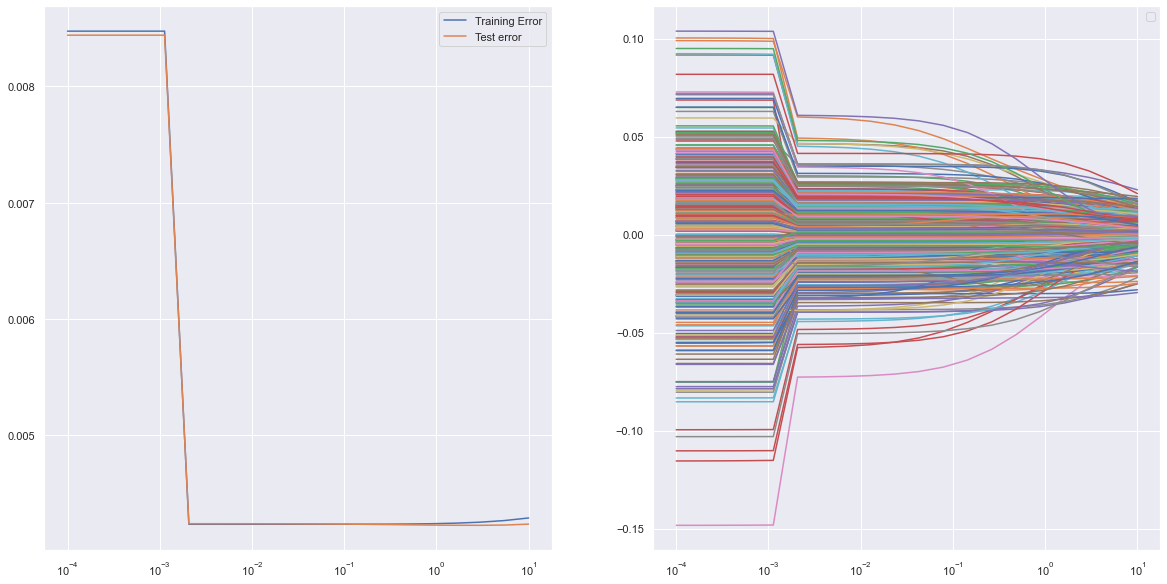

In [59]:
fig, ax = plt.subplots(ncols = 2, figsize = (20,10))

ax[0].plot(lambdas, mse_train.mean(0), label = 'Training Error')
ax[0].plot(lambdas, mse_test.mean(0),  label = 'Test error')
ax[0].legend()
ax[0].set_xscale('log')

ax[1].plot(lambdas, betas.mean(0))
ax[1].legend()
ax[1].set_xscale('log')

In [ ]:
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn import preprocessing as preproc # load preprocessing function

def centerData(data):
    
    mu = np.mean(data,axis=0)
    data = data - mu
    
    return data, mu


K = 5
M = 10
lambdas = np.logspace(-10, 1, M)
MSE = np.zeros((K, M))

kf = KFold(n_splits=K, shuffle = True)


mse_train = np.zeros((K, M))
mse_test  = np.zeros((K,M))
betas     = np.zeros((K,M,X.shape[-1]))
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"{i} out of {K} folds")
    X_train, X_test = X[train_index, :], X[test_index, :],
    y_train, y_test = y[train_index], y[test_index]
    

    for j, lambda_ in enumerate(lambdas):
        model = linear_model.Lasso(alpha = lambda_)
        model.fit(X_train, y_train)
        y_hat_train = model.predict(X_train)
        y_hat_test  = model.predict(X_test)

        err_train = pow(y_train - y_hat_train, 2).mean()
        err_test = pow(y_test - y_hat_test, 2).mean()

        mse_train[i,j] = err_train
        mse_test[i,j] = err_test

        beta = model.coef_.ravel()

        betas[i,j,:] = beta

    

In [ ]:
fig, ax = plt.subplots(ncols = 2, figsize = (20,10))

ax[0].plot(lambdas, mse_train.mean(0), label = 'Training Error')
ax[0].plot(lambdas, mse_test.mean(0),  label = 'Test error')
ax[0].legend()
ax[0].set_xscale('log')

ax[1].plot(lambdas, betas.mean(0))
ax[1].legend()
ax[1].set_xscale('log')